# Project Foundations for Data Science: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [140]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Understanding the structure of the data

In [142]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [143]:
# read the data
# df = pd.read_csv('/content/drive/MyDrive/MyFiles/MIT_IDSS_courese/foodhub_order.csv')
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Explore some basic information about the data

In [145]:
## Unique names of cuisine types.

print("Number of unique cuisine type: ", df["cuisine_type"].nunique())
print("----------------------------------------")
print()
## top 5 cuisine type

top_5_cuisine_type = df["cuisine_type"].value_counts().sort_values(ascending=False).head(5).index.to_list()
print("Top 5 cuisine type: ")
print("---------------------------")
print(top_5_cuisine_type)

Number of unique cuisine type:  14
----------------------------------------

Top 5 cuisine type: 
---------------------------
['American', 'Japanese', 'Italian', 'Chinese', 'Mexican']


#### Observations:

#### The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [148]:
# Write your code here
rows, cols = df.shape
print(f"Number of rows: {rows} and Number of columns: {cols}")


Number of rows: 1898 and Number of columns: 9


#### Observations:

### Number of rows: 1898 and number of columns: 9


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [151]:
# Use info() to print a concise summary of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

### 'rating' column should be taken speical care. The column contains both string like "Not Given" and number like "5" as string


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [154]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

### There are no missing values in the data


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [157]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
*   Cost of order varies from the minimum of 4.47 to the maximum of 35.41, while the mean cost is 16.5 along with a standard deviation of 7.5 dollars. The meadian cost is 14.14 dollars. Since the mean is slighly higher than the median, the distribution seemes to right-skewd. 25\% of the order costs above 22.30 dollars.

*   Average Food preparation time is 27 minutes with a standard deviation of 4.6 min. The range of food preparation time is 15 minutes (35 - 20 = 15)

* Average delivery time is 24 minutes. 75% of the time, the food is delivered within or under 28 minutes.



### **Question 5:** How many orders are not rated?

In [160]:
# Write the code here
count_rating_df = df['rating'].value_counts().sort_values(ascending=False).to_frame().reset_index()
count_rating_df.columns = ['rating', 'count']
count_rating_df["percentage"] = round((count_rating_df['count'] / count_rating_df['count'].sum()) * 100,1)
count_rating_df

,rating,count,percentage
0,Not given,736,38.8
1,5,588,31.0
2,4,386,20.3
3,3,188,9.9


#### Observations:

#### 39% of the observations (i.e., 736 out of 1898 observations) are Not Rated. They are marked with Not given ratings

In [162]:
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

Before we do EDA, uni and bivariate analysis, I took following steps:

a) Replace rating column's "Not given" with NaN as np.nan.

b) Convert all rating as float.

b) There are 178 unique restaurant names. Out of 178, 50 restaurant (almost 30%) have only one observations. So, for the sake of a sound analysis, I took those restaurants that have at least 50 observations.

c) Therefore, EDA here is based on these 7 restaurants that have at least 50 observations:

['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken', 'Parm', 'RedFarm Broadway', 'RedFarm Hudson']

In [167]:
# Number of unique restaurant
print("Number of unique restaurant: ", df["restaurant_name"].nunique())

# Total Number of unique restaurant that have only 1 observations
print("Number of unique restaurant with only one observations: ", (df["restaurant_name"].value_counts()==1).sum())

# Total Number of unique restaurant that have at least 50 observations
print("Number of unique restaurant having at least 50 observations: ", (df["restaurant_name"].value_counts()>=50).sum())

# Number of unique customer_id
print("Number of unique customer id: ", df["customer_id"].nunique())

Number of unique restaurant:  178
Number of unique restaurant with only one observations:  50
Number of unique restaurant having at least 50 observations:  7
Number of unique customer id:  1200


In [168]:
# Add a new column named rating_val
# Replace rating Not given with np.nan
# Convert all ratings as float

df["rating_val"] = df["rating"].apply(lambda x:np.nan if x=="Not given" else x)
# convert all ratings as float
df["rating_val"] = df["rating_val"].astype(float)

## Add another column "total time" as food preparation time + delivery time
df["total_time"] = df["food_preparation_time"] + df["delivery_time"]

df.sample(3, random_state=2007)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_val,total_time
1835,1477644,82041,Osteria Morini,Italian,5.77,Weekend,3,24,19,3.0,43
1221,1477776,115213,Tamarind TriBeCa,Indian,29.39,Weekend,5,30,25,5.0,55
1807,1477716,317515,Cafe Habana,Mexican,15.62,Weekend,Not given,29,19,NaN,48


In [169]:
df["rating_fillin"] = df.groupby(["customer_id", "cuisine_type"])["rating_val"].transform(lambda x: x.fillna(round(x.mean(),0)))

In [170]:
df.sample(3, random_state=2007)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_val,total_time,rating_fillin
1835,1477644,82041,Osteria Morini,Italian,5.77,Weekend,3,24,19,3.0,43,3.0
1221,1477776,115213,Tamarind TriBeCa,Indian,29.39,Weekend,5,30,25,5.0,55,5.0
1807,1477716,317515,Cafe Habana,Mexican,15.62,Weekend,Not given,29,19,NaN,48,NaN


In [171]:
# print(df["rating_filled"].value_counts(dropna=False))
print("percent of NaN reduces to 24.5% from 39%")
print(round(df["rating_fillin"].value_counts(dropna=False)/len(df["rating_fillin"])*100,2))

percent of NaN reduces to 24.5% from 39%
rating_fillin
5.0    38.04
4.0    25.92
NaN    24.50
3.0    11.54
Name: count, dtype: float64


In [172]:
# List the name of restaurants having at least 50 observations
restaurant_val_count = df["restaurant_name"].value_counts().to_frame().reset_index()
restaurant_val_count.columns = ["restaurant_name", "count"]
# print(restaurant_val_count.head(5))

restaurant_names = restaurant_val_count[restaurant_val_count["count"] >= 50]["restaurant_name"].to_list()

print()
print("Name of restaurants that have more than 50 orders in the dataset: ")
print(restaurant_names)


Name of restaurants that have more than 50 orders in the dataset: 
['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken', 'Parm', 'RedFarm Broadway', 'RedFarm Hudson']


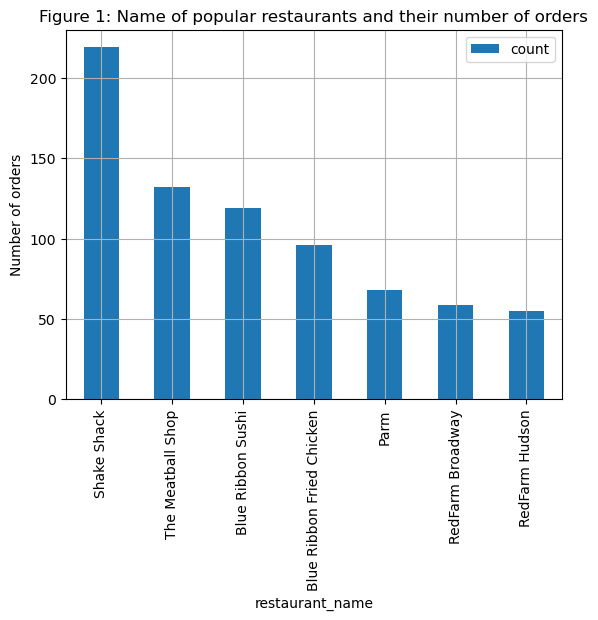

In [264]:
restaurant_val_count[restaurant_val_count["count"] >= 50].plot(kind="bar", x="restaurant_name", y="count")
plt.ylabel("Number of orders")
plt.title("Figure 1: Name of popular restaurants and their number of orders")
plt.grid()
plt.savefig("Most_popular_restaurants.png")
plt.show()

#### **Univariate Analysis**

In [175]:
# make a cleaner dataframe. Drop restaurants those have less than 50 observations
## Take only those restaurant names that have at least 50 observations
df_clean = df[df["restaurant_name"].isin(restaurant_names)]
# reset index
df_clean.reset_index(drop=True, inplace=True)

df_clean.sample(5, random_state=20071)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_val,total_time,rating_fillin
284,1478412,43018,RedFarm Hudson,Chinese,6.69,Weekend,Not given,24,20,NaN,44,5.0
5,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26,4.0,61,4.0
665,1478306,358158,Parm,Italian,9.12,Weekend,Not given,23,21,NaN,44,5.0
218,1477450,79215,Blue Ribbon Sushi,Japanese,11.93,Weekend,3,24,21,3.0,45,3.0
81,1478089,134294,Shake Shack,American,15.28,Weekday,4,30,29,4.0,59,4.0


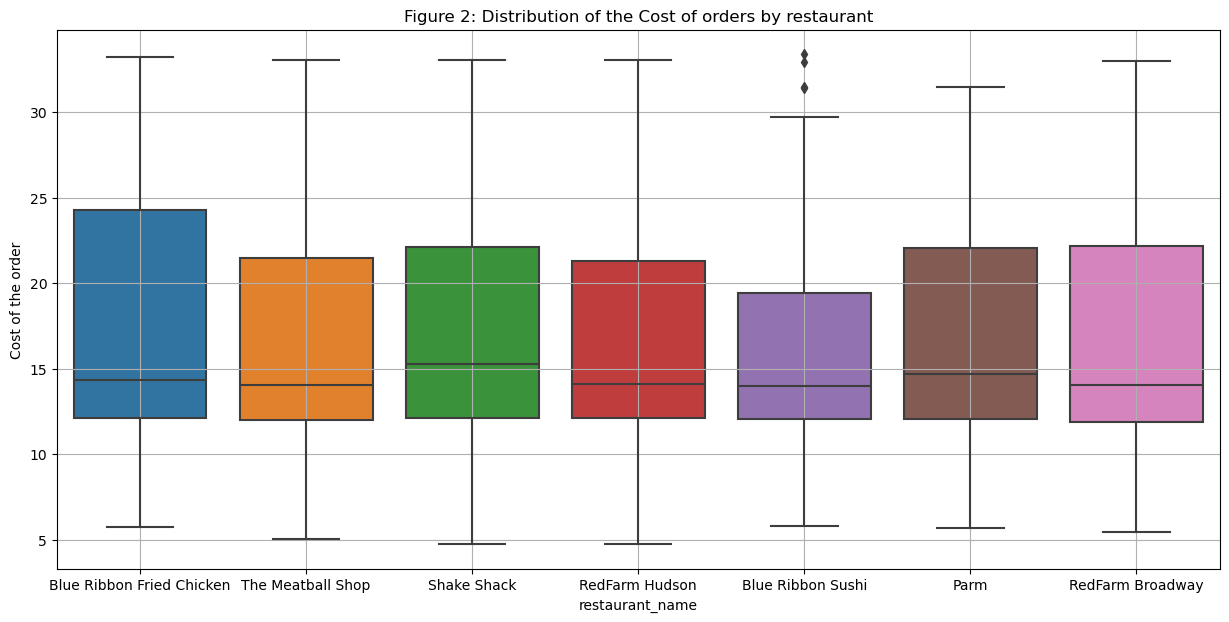

In [176]:
## Boxplot of cost of orders by restaurants
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
sns.boxplot(data=df_clean, x="restaurant_name", y = "cost_of_the_order", ax=ax)
plt.ylabel("Cost of the order")
plt.title("Figure 2: Distribution of the Cost of orders by restaurant")
plt.grid()
plt.show()

#### Observation (Cost of orders):

#### Median costs (approx. 15 dollars) are almost same across restaurants.

#### Distribution of cost of orders are slightly right-skewed for all selected restaurants



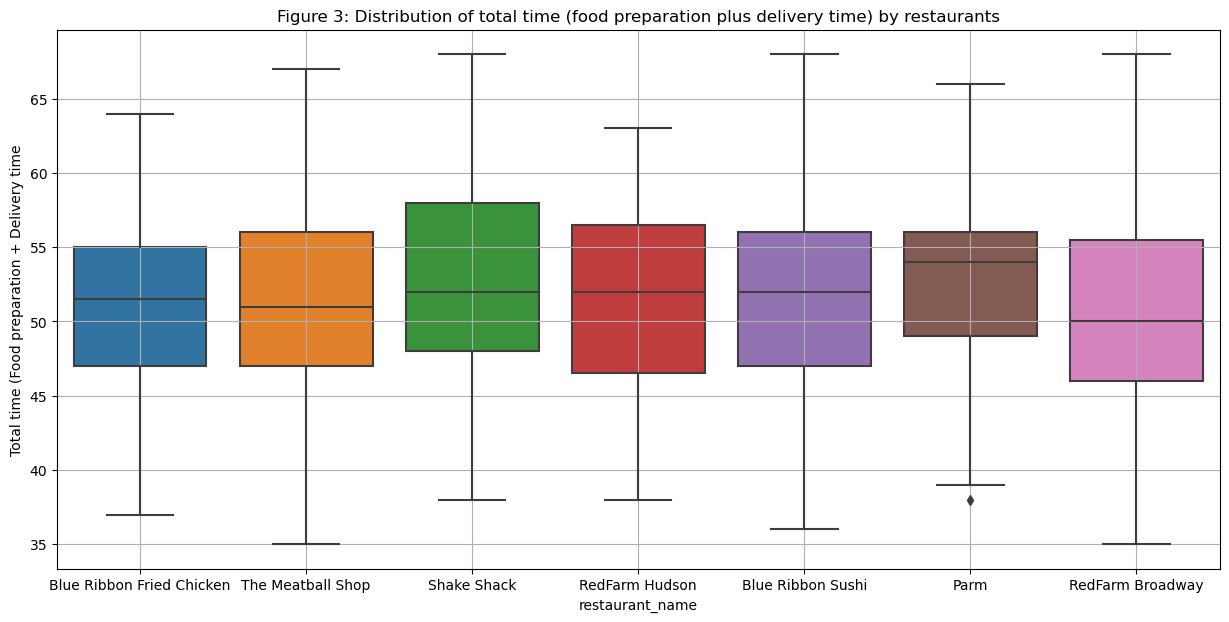

In [178]:
## Boxplot of Food preparation time by restaurants

fig1, ax1 = plt.subplots(1, 1, figsize=(15, 7))

sns.boxplot(data=df_clean, x="restaurant_name", y = "total_time", ax=ax1)
plt.ylabel("Total time (Food preparation + Delivery time")
plt.xticks(rotation=0)
plt.title("Figure 3: Distribution of total time (food preparation plus delivery time) by restaurants")
plt.grid()
plt.show()

#### Observation (total time = food preparation time + delivery time):

#### Shake Shack has higher food preparation and delivery time compared to other restaurants.

#### 75% of times, the sum of food preparation and delivery time are within 55 to 57 minutes

#### The minimum total time (food preparation plus delivery time) is 35 minutes.

#### **Bivariate analysis**


#### We can more explore with cuisine type, rating, and cost

### Distribution of cost of the orders with respect to ratings and cuisine type for top restaurants (>= 50 orders)

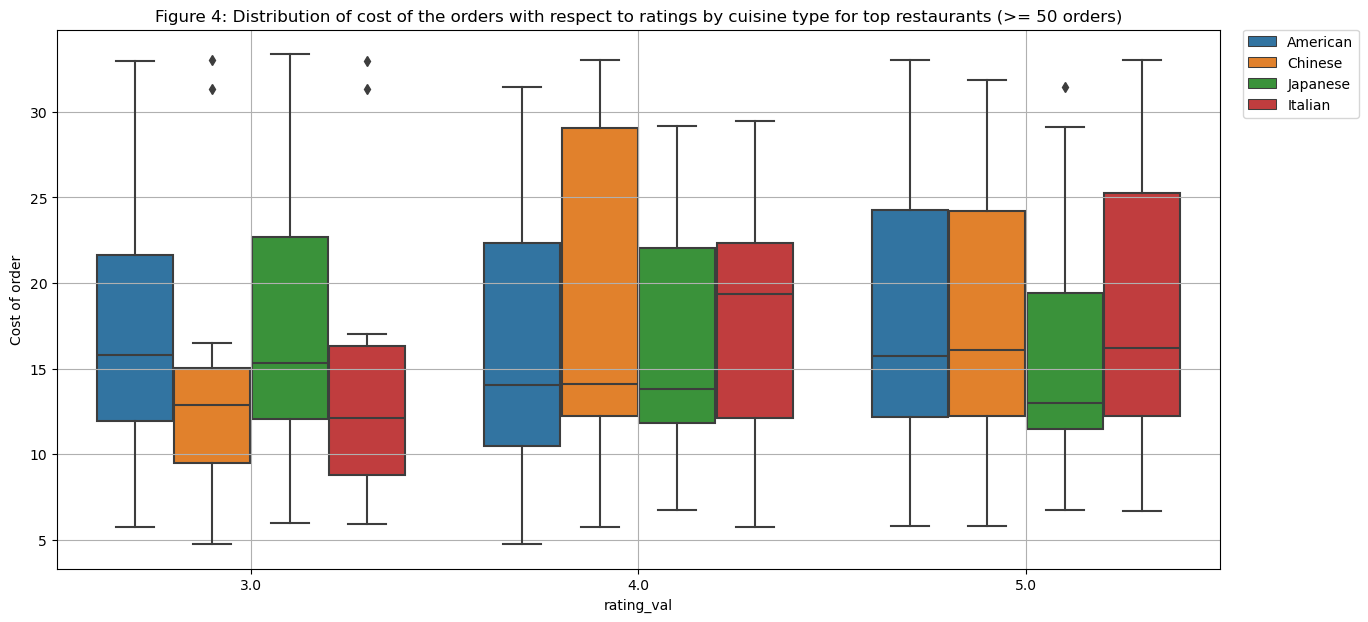

In [183]:
fig8, ax8 = plt.subplots(1,1, figsize=(15, 7))
sns.boxplot(data=df_clean.dropna(subset="rating_fillin"), x="rating_val", y="cost_of_the_order", hue="cuisine_type",ax=ax8)

plt.ylabel("Cost of order")
plt.xticks(rotation=0)
# legend = ax6.legend_
# labels=["American", "Chinese", "Japanese", "Italian"]
# plt.legend(labels)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Figure 4: Distribution of cost of the orders with respect to ratings by cuisine type for top restaurants (>= 50 orders)")
plt.grid()
plt.savefig("Cost_distribution_by_cuisine_type_and_ratings.png")
plt.show()

#### Observation

#### Restaurant with at least 50 orders have four cuisine type: American, Chinese, Italian, and Japanese.

#### It seems that some low cost Chinese and Italian foods contributes to ratings of less than 4

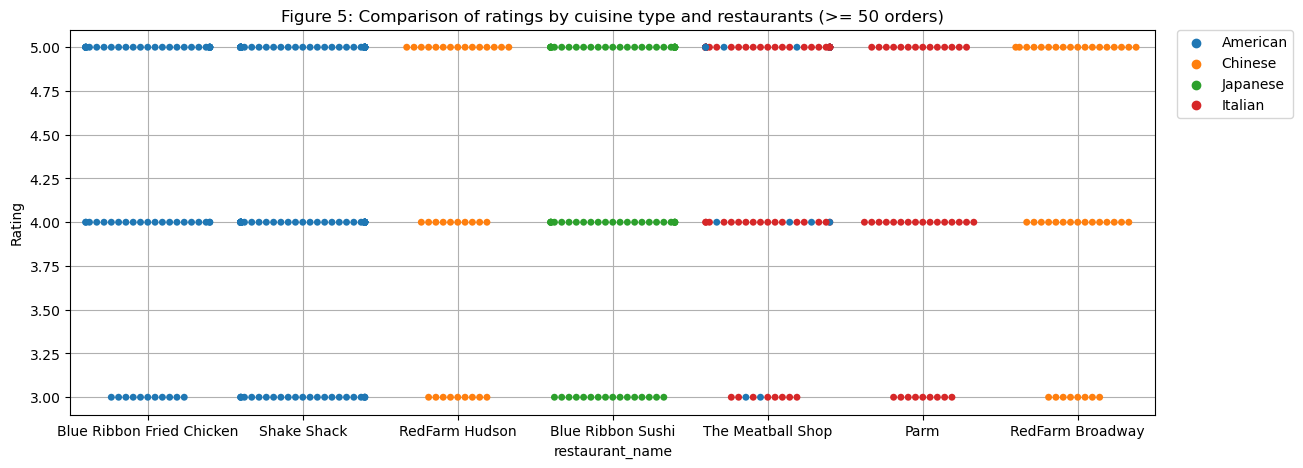

In [185]:
## SEE cost, ratings, food preparation time, and delivery time by cuisine types and restaurants with at least 50 orders

## top_5_cuisine_type = ['American', 'Japanese', 'Italian', 'Chinese', 'Mexican']

fig6, ax6 = plt.subplots(1,1, figsize=(14, 5))
sns.swarmplot(data=df_clean.dropna(subset="rating_fillin"), x="restaurant_name",  y="rating_val",  hue="cuisine_type", ax=ax6)
plt.ylabel("Rating")
plt.xticks(rotation=0)
plt.title("Figure 5: Comparison of ratings by cuisine type and restaurants (>= 50 orders)")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.grid()
plt.show()

#### Observation (rating by cuisine type and restaurants)

#### We expect less number of rating 3 and more number of rating 4 and above. Blue Ribbon Fried Chicken has more ratings of above 3. But Blue Ribbon Sushi and Shahe Shack has higher number of ratings of 3

#### Restarants are specialized by cuisine type. Blue Ribbon and Shake Shack have only American foods. RedFarm Hudson and RedFarm Broadway are Chinese restaurants. Parm is an Italian restaurant.


### Effect of weekend and weekdays

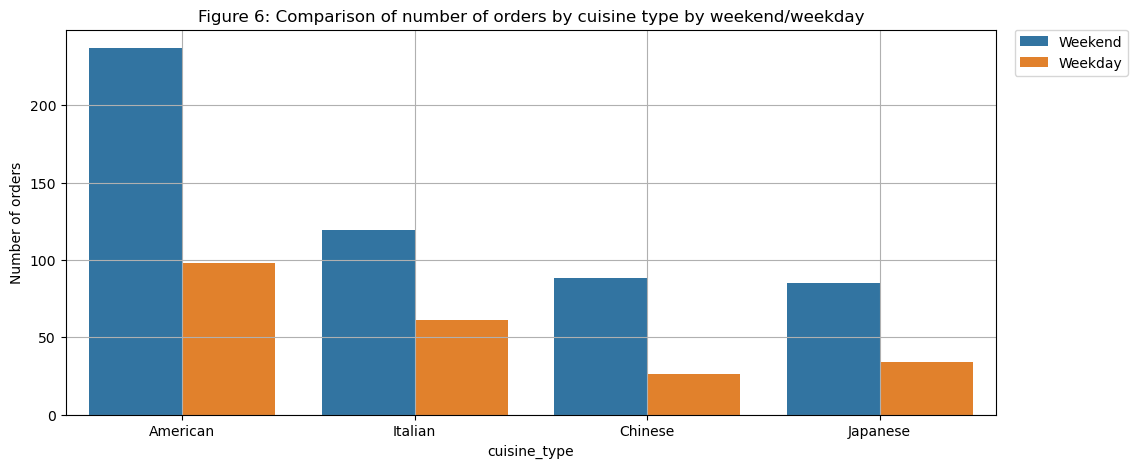

In [188]:
fig8, ax8 = plt.subplots(1,1, figsize=(12, 5))
# sns.boxplot(data=df_clean, x="cuisine_type", y="cost_of_the_order", hue="day_of_the_week",ax=ax8)
sns.countplot(data=df_clean, x="cuisine_type",  hue="day_of_the_week",ax=ax8)
plt.ylabel("Number of orders")
plt.xticks(rotation=0)
plt.title("Figure 6: Comparison of number of orders by cuisine type by weekend/weekday")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.grid()
plt.show()

### Weekend pulled more number of orders. American food is the most popular cuisine type.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [191]:
# Write the code here

df_clean["restaurant_name"].value_counts().head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:

#### Top 5 restaurant in terms of number of orders received are:
#### 'Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken', 'Parm'


### **Question 8**: Which is the most popular cuisine on weekends?

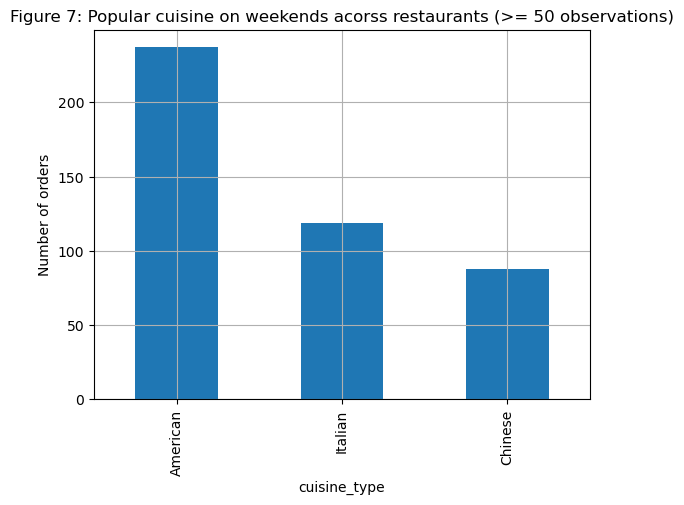

In [194]:
df_weekend = df_clean[df_clean["day_of_the_week"]=="Weekend"]
df_weekend["cuisine_type"].value_counts().head(3).plot(kind="bar")
plt.ylabel("Number of orders")
plt.title("Figure 7: Popular cuisine on weekends acorss restaurants (>= 50 observations)")
plt.grid()
plt.show()


#### Observations:

#### American cuisine type is the most popular in weekends


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [197]:
# Write the code here
print("Percent of orders (across all restaurants in New York) that costs more than 20 dollars:")
print(round(df[df["cost_of_the_order"] > 20].shape[0] / df.shape[0] * 100, 2))

Percent of orders (across all restaurants in New York) that costs more than 20 dollars:
29.24


#### Observations:

#### 29% of the orders cost more than 20 dollars across all restaurants.


### **Question 10**: What is the mean order delivery time?

In [200]:
# Write the code here
print("Mean delivery time acorss all restaurant:")
print(round(df[df["delivery_time"]>0]["delivery_time"].mean(),2))

Mean delivery time acorss all restaurant:
24.16


#### Observations:

#### Mean delivery time acorss all restaurant is 24 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [203]:
# Write the code here
print(df["customer_id"].value_counts().sort_values(ascending=False).head(5))

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
Name: count, dtype: int64


#### Observations:

#### Top 3 customer IDs: [52832, 47440, 83287]


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

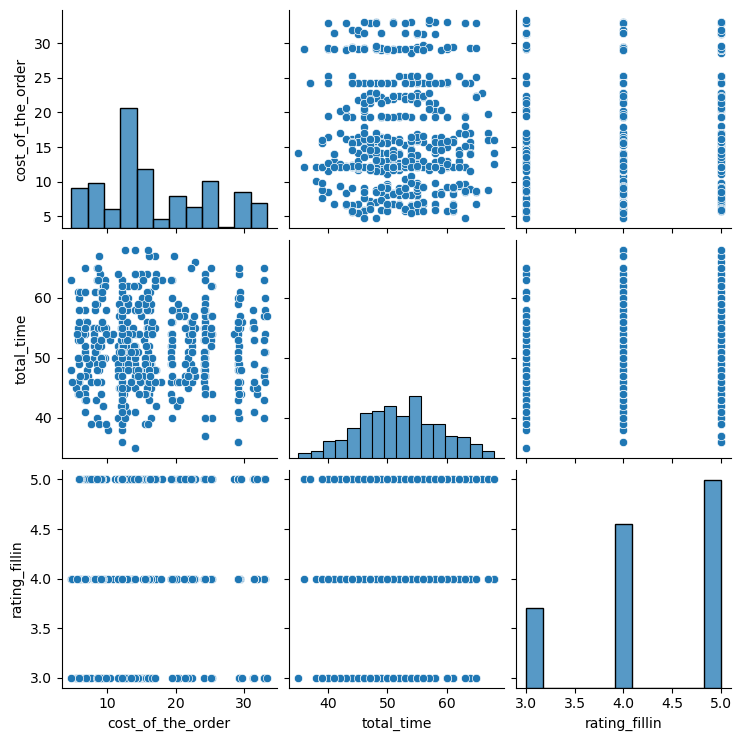

In [207]:
# Write the code here
## Pair plot - to make the analysis precise I take observations from restaurants with at least 50 observations

df_cln_1 = df_clean.dropna(subset=["rating_fillin"]) ## drop rows with -99 (equivalent to Not given)

selected_cols = ['cost_of_the_order', 'total_time', 'rating_fillin']
# fig5, ax5 = plt.subplots(1,1, figsize=(15, 8))
sns.pairplot(data=df_cln_1[selected_cols])
# sns.pairplot(data=df_cln_1[df_cln_1["restaurant_name"]=="Shake Shack"][selected_cols])
# plt.title("Pair plot showing trend and distirbution for Shake Shack")
plt.show()


#### Observation from the pair plot (considering restarants with at least 50 observations):

#### No distinct relationship is observed from scatter plots among ratings, cost, food preparation time and delivery time.

#### Distribution of cost of orders is right-skewed.

#### DIstribution of total time (food preparation + delivery time) is normally ditributed acorss restaurant




### Observation

#### Correlation coefficient also shows no distinct relationship/association among cost, rating, and total time (food preparation and delivery time)

#### The correlation here is calculated for restaurant with at least 50 observations

In [210]:
df_cln_1[selected_cols].corr()

,cost_of_the_order,total_time,rating_fillin
cost_of_the_order,1.000000,-0.033307,0.082929
total_time,-0.033307,1.000000,0.086059
rating_fillin,0.082929,0.086059,1.000000


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [212]:
# Write the code here

# Name of restaurants that have more than 50 orders in the dataset:
# restaurant_names =['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken', 'Parm', 'RedFarm Broadway', 'RedFarm Hudson']
df_rating_count = df.copy()

df_rating_count.dropna(subset=["rating_fillin"])

df_rating_count.reset_index(drop=True, inplace=True)

df2 = df_rating_count.groupby("restaurant_name").agg({"rating_fillin": ["mean", "count"]})


df2.columns = ["avg_rating", "rating_count"]

df2.reset_index(inplace=True)



print()
df3 = df2[(df2["avg_rating"]>4) & (df2["rating_count"]>=50)]
df3 = df3.sort_values(by="avg_rating", ascending=False).reset_index(drop=True)
print("--------------- High rating restaurants ----------------")
print(df3.head(5))
print("--------------------------------------------------------")
print()
print("Name of restaurants that meet the criteria to get the promotional offer: ")
print(df3["restaurant_name"].to_list())


print()
df4 = df2[(df2["avg_rating"]<4) & (df2["rating_count"]<50)]
print("--------------- Low rating restaurants ----------------")
print(df4.tail())
print("--------------------------------------------------------")
print("Restaurants with low ratings: ", df4.tail()["restaurant_name"].to_list()[::-1])





--------------- High rating restaurants ----------------
             restaurant_name  avg_rating  rating_count
0          The Meatball Shop    4.536842            95
1                Shake Shack    4.283951           162
2  Blue Ribbon Fried Chicken    4.280000            75
3          Blue Ribbon Sushi    4.222222            99
--------------------------------------------------------

Name of restaurants that meet the criteria to get the promotional offer: 
['The Meatball Shop', 'Shake Shack', 'Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi']

--------------- Low rating restaurants ----------------
    restaurant_name  avg_rating  rating_count
149  Terakawa Ramen    3.500000             2
154       The Odeon    3.500000             2
165   Waverly Diner    3.714286             7
168        Woorijip    3.000000             1
174            brgr    3.000000             2
--------------------------------------------------------
Restaurants with low ratings:  ['brgr', 'Woorijip', 'Waver

#### Observations:

#### Name of restaurants that meet the criteria to get the promotional offer:

#### ['The Meatball Shop', 'Blue Ribbon Fried Chicken', 'Shake Shack', 'Blue Ribbon Sushi']


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [215]:
# Write the code here
cost_over_20 = df[df["cost_of_the_order"]>20]["cost_of_the_order"].sum() * 0.25

# print(cost_over_20)

cost_over_5 = df[(df["cost_of_the_order"]>5) & (df["cost_of_the_order"]<=20)]["cost_of_the_order"].sum() * 0.15

# print(cost_over_5)

print("Net revenue generated by the company across all orders:")
print(round(cost_over_20 + cost_over_5,2))


Net revenue generated by the company across all orders:
6166.3


#### Observations:

#### Net revenue generated by the company across all orders: 6,166.3


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [218]:
# Write the code here

df["total_time"] = df["food_preparation_time"] + df["delivery_time"]

print("Percentage of orders taking more than 60 minutes to get delivered from the time order is placed:")
print(round(df[df["total_time"]>60].shape[0]/(df.shape[0]) * 100, 2))

Percentage of orders taking more than 60 minutes to get delivered from the time order is placed:
10.54


#### Observations:

#### Percentage of orders taking more than 60 minutes to get delivered from the time order is placed: approx. 11%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [221]:
# Write the code here

df_mean_time= df.groupby("day_of_the_week").agg({"delivery_time": ["mean"]})
df_mean_time.columns = ["mean_delivery_time"]
df_mean_time.reset_index(drop=False, inplace=True)
print(df_mean_time.head())

  day_of_the_week  mean_delivery_time
0         Weekday           28.340037
1         Weekend           22.470022


#### Observations:

#### Mean delivery time (Weekday): 28 minutes

#### Mean delivery time (Weekend): 22 minutes


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:

*  The dataset contains customer id, cuisine types, cost of orders, food prepartion time, delivery time, rating by individual customer for 178 unique restaurants in New York for 1200 unique customers. The total number of observation is 1898.


* 39% of all ratings were not given by customers. So these NaN ratings are filled-in with average ratings given by its customer and his/her chosen cuisine. So number of NaN ratings are reduced to 24%.


* Most popular cuisine is American food type. Other popular food types are Chinese, Italian, Japanese, and Mexican.


* Most visited restaurants are: 'The Meatball Shop', 'Shake Shack', 'Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi


* Top rated restaurants are: 'The Meatball Shop', 'Blue Ribbon Fried Chicken', 'Shake Shack', 'Blue Ribbon Sushi


* Low rating restaurants are: 'brgr', 'Woorijip', 'Waverly Diner', 'The Odeon', 'Terakawa Ramen'


* It is found from Figure 4 that some low cost Chinese and Japanese cuisine contributed to lower ratings. Futher investigation should be done to find out reasons


* Weekend has higher number of orders than weekdays as expected. Weekend delivery time is lower that the weekday delivery time


* No distinct relationship among cost of orders, rating, and total time (food preparation plud delivery time) is observed.


### Recommendations:

 #### To increase the revenue of the FoodHub, following strategies can be adopted:

* Marketing Strategies:

  * Promote high rating restaurants like The Metaball Shop, Shake Shack, Blue Ribbon Fried Chicken, implementing a loyality program in which where customers earn points for every order, which can be redeemed for discounts or free items.
  
  * Customer segmentation based on their order history, preferences, and demographics. Create tailored marketing campaigns for each segment.
  
  * Leverage weekend, weekday, and local events for special promotions and cuisine type.
  
  * Internally alert low rating restaurants like bigi, Woorijip, to improve their quality and services.

* UX (Customer Experience) strategies:

  * implement ML and AI to offer personalized recommendation based on past order histories and preferences.
  
  * Incorporate a system for storing, reviewing, and analyzing feedbacks to improve the app quality.

* Data Analytics and AI

  * Regular reviews of performance metrics (like average ratings, average costs) and adjst statrategies regularly, for example, investigate why some low cost Chinese and Italian foods (see Figure 4) contributing to low ratings.


Implementing above strategies can effectively enhance profitability of FoodHub. Regular review, evalauation, and adaptation to market trends and customer feedback can ensure growth and success.




In [227]:
# !jupyter nbconvert --to html FDS_Project_LearnerNotebook_FullCode.ipynb

---